<a href="https://colab.research.google.com/github/Aleksandra2002/obliczenia_naukowe/blob/main/lab_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#GRAFY

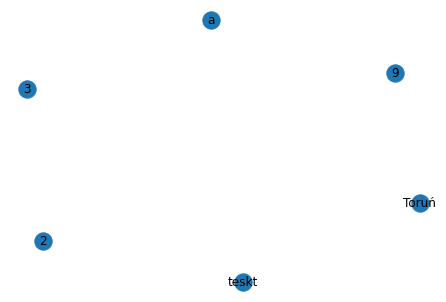

In [11]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
G= nx.Graph() #tworzymy graf
G.add_node('a') #wszystko może być wierzchołkiem, oprócz listy
G.add_node(9, weight = 5, color = 'red')
G.add_nodes_from(['teskt', 'Toruń', 2, 3])
nx.draw(G, with_labels=True) #można wcześniej narysować rysunek i graf stworzy się na ostatnim rysunku

In [17]:
G.nodes #pokazuje wierzchołki, ale NIE LISTE
list(G.nodes) #lista wierzchołków

['a', 9, 'teskt', 'Toruń', 2, 3]

In [ ]:
#można odczytac z grafu daną wartość
#można dodawać nowe wartości

##krawedzie

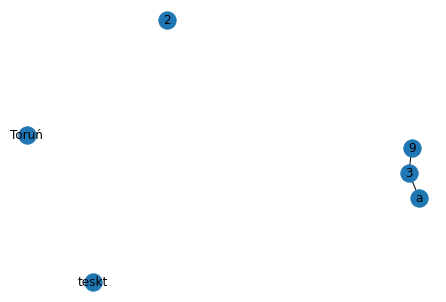

In [20]:
G.add_edge(9,3)
nx.draw(G, with_labels=True)

In [21]:
H=nx.Graph([(1,2),(22,33),(11,33)])
H.edges

EdgeView([(1, 2), (22, 33), (33, 11)])

In [27]:
H.add_nodes_from(G.nodes)
H.number_of_edges() #liczba krawędzi
H.number_of_nodes() #liczba wierzchołków

10

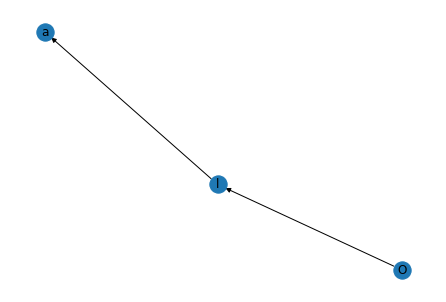

In [33]:
F = nx.DiGraph()
F.add_nodes_from(['O','l','a'])
F.add_edges_from([('O','l'),('l','a')])
nx.draw(F,with_labels=True)

In [38]:
import requests
import json
data = requests.get('https://raw.githubusercontent.com/danio2010/ON2022/main/tokyo-metro.json').json()
type(data)

dict

In [40]:
print(data.keys())
data['C']['transfers']

dict_keys(['C', 'G', 'F', 'H', 'M', 'N', 'T', 'Y', 'Z'])


[['C3', 'F15'],
 ['C4', 'Z2'],
 ['C4', 'G2'],
 ['C7', 'M14'],
 ['C7', 'N6'],
 ['C7', 'G6'],
 ['C8', 'M15'],
 ['C8', 'H6'],
 ['C9', 'H7'],
 ['C9', 'Y18'],
 ['C11', 'T9'],
 ['C11', 'M18'],
 ['C11', 'Z8'],
 ['C12', 'M19'],
 ['C18', 'H21']]

In [47]:
metro = nx.Graph()
przesiadki = []
for linia in data.values():
  przesiadki.extend(linia['transfers'])
#for linia_nazwa in data.keys():
#  przesiadki2.extend(data[linia_nazwa]['transfer'])
polaczenie = []
for linia in data.values():
  polaczenie.extend(linia['travel_times'])
metro.add_weighted_edges_from(polaczenie,transfer=True) #dodanine krawedzi czasu miedzy stacjami
metro.add_edges_from(przesiadki, transfer=True) #dodanie krawedzi z atrybutem 

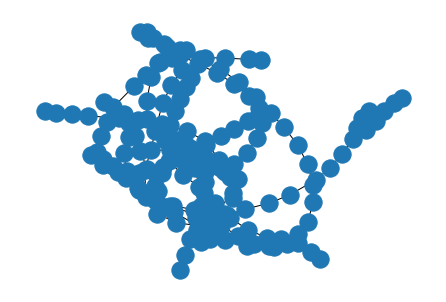

In [48]:
nx.draw(metro)

In [49]:
metro.adj #sąsiedzi

AdjacencyView({'C1': {'C2': {'transfer': True, 'weight': 2}}, 'C2': {'C1': {'transfer': True, 'weight': 2}, 'C3': {'transfer': True, 'weight': 2}}, 'C3': {'C2': {'transfer': True, 'weight': 2}, 'C4': {'transfer': True, 'weight': 1}, 'F15': {'transfer': True}}, 'C4': {'C3': {'transfer': True, 'weight': 1}, 'C5': {'transfer': True, 'weight': 2}, 'Z2': {'transfer': True}, 'G2': {'transfer': True}}, 'C5': {'C4': {'transfer': True, 'weight': 2}, 'C6': {'transfer': True, 'weight': 2}}, 'C6': {'C5': {'transfer': True, 'weight': 2}, 'C7': {'transfer': True, 'weight': 2}}, 'C7': {'C6': {'transfer': True, 'weight': 2}, 'C8': {'transfer': True, 'weight': 1}, 'M14': {'transfer': True}, 'N6': {'transfer': True}, 'G6': {'transfer': True}}, 'C8': {'C7': {'transfer': True, 'weight': 1}, 'C9': {'transfer': True, 'weight': 3}, 'M15': {'transfer': True}, 'H6': {'transfer': True}}, 'C9': {'C8': {'transfer': True, 'weight': 3}, 'C10': {'transfer': True, 'weight': 1}, 'H7': {'transfer': True}, 'Y18': {'tran

In [51]:
kolory=[data[stacja[0].upper()]['color'] for stacja in metro.nodes()]

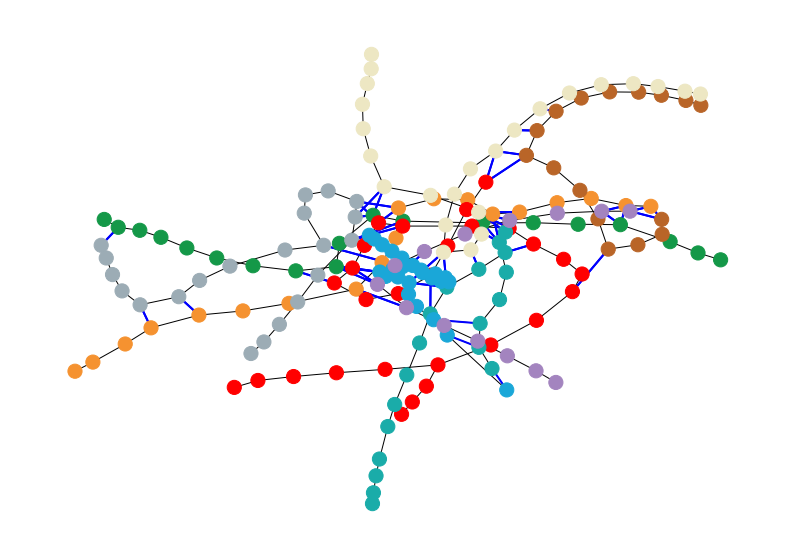

In [61]:
fig, osie = plt.subplots(1,1, figsize=(14,10))
pozycje = nx.spring_layout(metro)
nx.draw(metro, pos=pozycje, ax=osie, node_size=200, node_color=kolory)
nx.draw_networkx_edges(metro,pozycje,ax = osie, edgelist=przesiadki, width = 2, edge_color = 'blue' ) #na niebiesko przesiadki

In [73]:
d_max = max(d for (n,d)in metro.degree()) #max po stopniach wierzcholkow d-prze
d_max
#wypisz stacje które maja najwiecej krawedzi
for (n,d) in metro.degree(): 
  if d == d_max:
     print (n)


G5
M13
N7
Y16
Z4


In [72]:
#wypisz stacje koncowe
for (n,d) in metro.degree():
  if d == 1:
     print (n)

C1
C19
G19
H1
M1
m3
N19
T24
Y24
Z14


In [75]:
nx.shortest_path(metro,'C5','Y3')

['C5',
 'C4',
 'C3',
 'F15',
 'F14',
 'F13',
 'F12',
 'F11',
 'F10',
 'F9',
 'Y9',
 'Y8',
 'Y7',
 'Y6',
 'Y5',
 'Y4',
 'Y3']